<a href="https://colab.research.google.com/github/KeiandraK/Keiandra-King_UNIT-2-BW/blob/master/Keiandra_King_Project_2_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A guide to work by


1.   Clean the data
2.   Get to know the data
3.   Define whether it is classification or regression
4.   Define target
5.   Make awesome visualizations 
6.   Double check and markdown work as needed.
7.   Continue to add to list as I progress

## Leading Causes of Death
The data represents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999.

In [1]:
# Data Set 1
import pandas as pd
import numpy as np
causes_death=pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD')
causes_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


# Goals:
The goal of this project is to predict the accuracy of the information given and if this model could be used to predict future deaths.

In [2]:
causes_death.shape

(10868, 6)

In [3]:
causes_death['Deaths'].head(100)

0     169936
1       2703
2        436
3       4184
4       1625
       ...  
95     70096
96    198106
97     18035
98      6007
99     68579
Name: Deaths, Length: 100, dtype: int64

In [4]:
causes_death['Year']

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
10863    1999
10864    1999
10865    1999
10866    1999
10867    1999
Name: Year, Length: 10868, dtype: int64

In [6]:
#Checking for NaN values
causes_death.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [8]:
# Defining the target as Deaths
# Creating a baseline
deaths_recorded= causes_death['Deaths']
deaths_recorded.head()

0    169936
1      2703
2       436
3      4184
4      1625
Name: Deaths, dtype: int64

In [9]:
causes_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


## **The Engineered feature represents the approximate number of deaths for that age adjusted rate.**

In [0]:
# Engineering new features 
# Engineering features first so it will already be apart of the train, test, val
# Can better give a percentage of the actual death total for that age rate
causes_death['Deaths_adjusted_rate']=causes_death['Deaths'] / causes_death['Age-adjusted Death Rate']

In [12]:
causes_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Deaths_adjusted_rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4,3440.000000
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,50.241636
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,6.844584
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,74.448399
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,31.370656


In [0]:
# Splitting data in to train and test 
from sklearn.model_selection import train_test_split
train, test = train_test_split(causes_death, train_size=0.80, test_size=0.20, 
                              random_state=42)

In [14]:
train.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Deaths_adjusted_rate
4264,2010,Diabetes mellitus (E10-E14),Diabetes,Alabama,1302,25.0,52.080000
2457,2013,Cerebrovascular diseases (I60-I69),Stroke,Illinois,5294,36.7,144.250681
393,2017,Influenza and pneumonia (J09-J18),Influenza and pneumonia,Nevada,636,19.6,32.448980
9952,2000,Chronic lower respiratory diseases (J40-J47),CLRD,Maryland,1927,40.9,47.114914
3037,2012,Cerebrovascular diseases (I60-I69),Stroke,Massachusetts,2371,28.3,83.780919


In [15]:
test.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Deaths_adjusted_rate
5820,2007,All Causes,All causes,Washington,47323,731.9,64.657740
1511,2015,Influenza and pneumonia (J09-J18),Influenza and pneumonia,Arkansas,700,20.0,35.000000
2638,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Pennsylvania,31629,179.0,176.698324
5526,2008,Influenza and pneumonia (J09-J18),Influenza and pneumonia,Indiana,1318,19.5,67.589744
1713,2015,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,510,20.4,25.000000


In [16]:
# Checking the shape of the train and test
print(train.shape)
print(test.shape)

(8694, 7)
(2174, 7)


In [0]:
# setting target as cause name
target='Age-adjusted Death Rate'
features= causes_death.columns.drop(target)
X_train= train[features]
y_train= train[target]
X_test= test[features]
y_test= test[target]

In [18]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8694, 6)
(8694,)
(2174, 6)
(2174,)


In [19]:
y_train.value_counts(normalize = True)

19.8     0.003566
11.2     0.003451
18.7     0.003451
20.3     0.003451
19.7     0.003451
           ...   
171.4    0.000115
912.4    0.000115
942.9    0.000115
197.6    0.000115
174.1    0.000115
Name: Age-adjusted Death Rate, Length: 2227, dtype: float64

In [20]:
!pip install category_encoders==2.*
!pip install pdpbox

     |████████████████████████████████| 102kB 2.9MB/s 
     |████████████████████████████████| 57.7MB 39kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=0dfc5f1e4d7d41388ecf24d5a4126689be1776632f64184735ea93e23847ee9a
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_depth=25,random_state=55) 
    
    )
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['113 Cause Name', 'Cause Name', 'State'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=25, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_sampl

In [22]:
from sklearn.metrics import accuracy_score
pipeline.score(X_test,y_test)

0.9989750811248123

# **The model above used the Random Forest Regressor for the first predictive model. The results show that the model is too perfect. This means that there is data leakage. For the second attempt I will use Random Forest Classifier as a hyperparameter for the model.**

In [0]:
# I have data leakage
# I am about to drop the two columns that are leaking data
deaths= causes_death.drop(['113 Cause Name','Cause Name'],axis = 1)

In [0]:
# Splitting data in to train and test 
from sklearn.model_selection import train_test_split
train_2, test_2 = train_test_split(causes_death, train_size=0.80, test_size=0.20, 
                              random_state=42)

In [0]:
# setting a new target as Deaths
target='Deaths'
features= deaths.columns.drop(target)
X_train_1= train_2[features]
y_train_1= train_2[target]
X_test_1= test_2[features]
y_test_1= test_2[target]

In [0]:
!pip install category_encoders==2.*
!pip install pdpbox

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 57.7MB 41kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=701244e90c21b074c5913eb00ea38dcf0865bc0d82bc56eaf1fb0d2395a93ea8
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [26]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),  
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train_1, y_train_1)
print('Validation Accuracy', pipeline.score(X_test_1, y_test_1))

Validation Accuracy 0.012419503219871205


In [29]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test_1)
accuracy_score(y_test_1, y_pred)

0.012419503219871205

In [30]:
y_test_1.shape, y_pred.shape, X_test_1.shape

((2174,), (2174,), (2174, 4))

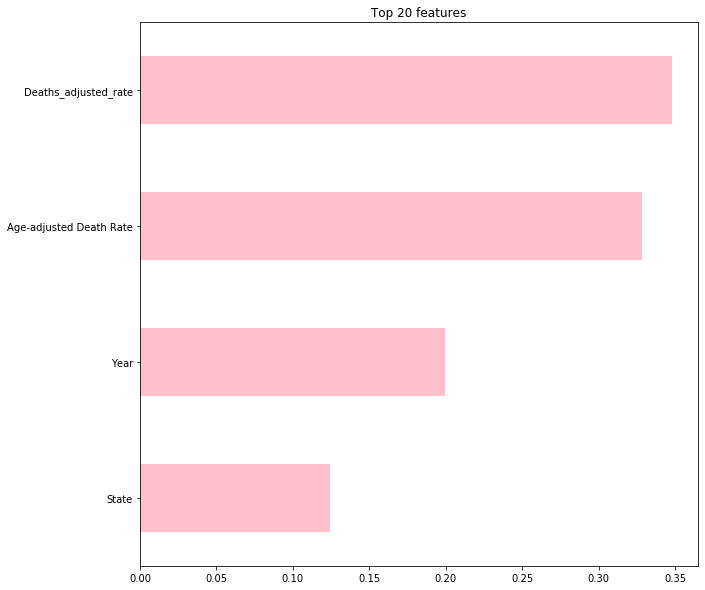

In [32]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_1.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='pink');

In [37]:
column  = 'Age-adjusted Death Rate'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train_1.drop(columns=column), y_train_1)
score_without = pipeline.score(X_test_1.drop(columns=column), y_test_1)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train_1, y_train_1)
score_with = pipeline.score(X_test_1, y_test_1)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Age-adjusted Death Rate: 0.00045998160073597056
Validation Accuracy with Age-adjusted Death Rate: 0.012419503219871205
Drop-Column Importance for Age-adjusted Death Rate: 0.011959521619135233


In [41]:
#Elif library
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train_1)
X_val_transformed = transformers.transform(X_test_1)

model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
# Upgrading tensflow to tensorflow.2.0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [43]:
pip install eli5


     |████████████████████████████████| 112kB 3.5MB/s 


In [45]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_test_1)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                      

In [47]:
feature_names= X_test_1.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Deaths_adjusted_rate       0.011684
Age-adjusted Death Rate    0.011316
State                      0.005888
Year                       0.002944
dtype: float64

In [48]:
feature_names = X_test_1.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0117 ± 0.0005,Deaths_adjusted_rate
0.0113 ± 0.0009,Age-adjusted Death Rate
0.0059 ± 0.0033,State
0.0029 ± 0.0023,Year


In [52]:
print('Shape before removing features:', X_train_1.shape)

Shape before removing features: (8694, 4)


In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train_1.columns[mask]
X_train_1 = X_train_1[features]

In [55]:
X_test_1 = X_test_1[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train_1, y_train_1)
print('Validation Accuracy', pipeline.score(X_test_1, y_test_1))

Validation Accuracy 0.012419503219871205


In [56]:
# Using G Boost
from xgboost import XGBClassifier

xgboos = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    XGBClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)

xgboos.fit(X_train_1, y_train_1)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['State'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'State',
                                          'data_type': dtype('O'),
                                          'mapping': Alabama                  1
Illinois                 2
Nevada                   3
Maryland                 4
Massachusetts            5
Wisconsin                6
Wyoming                  7
West Virginia            8
New York                 9
New Mexico              10
Alaska                  11
Utah                    12
Ohio                    13
Missouri                14
Arkansas                15
Oklahoma                16
Nor...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsampl

In [58]:
from sklearn.metrics import accuracy_score
y_pred = xgboos.predict(X_test_1)
print('Validation Accuracy', accuracy_score(y_test_1, y_pred))

Validation Accuracy 0.0013799448022079118


In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=10, 
    max_depth=10,      
    learning_rate=0.5, 
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50)

[0]	validation_0-merror:0.997355	validation_1-merror:0.99655
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.993329	validation_1-merror:0.9931
[2]	validation_0-merror:0.982747	validation_1-merror:0.983324
[3]	validation_0-merror:0.97205	validation_1-merror:0.971248
[4]	validation_0-merror:0.956522	validation_1-merror:0.954572
[5]	validation_0-merror:0.935243	validation_1-merror:0.92812
[6]	validation_0-merror:0.912123	validation_1-merror:0.905118
[7]	validation_0-merror:0.890499	validation_1-merror:0.894192
[8]	validation_0-merror:0.86646	validation_1-merror:0.862565
[9]	validation_0-merror:0.846906	validation_1-merror:0.848189


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## The main focus was to predict the accuracy of the data and to see if the models would be usefull to do so. After exhausting every option of dropping features and changing targets. The accuracy of the data was consistantly above 95%. Data leakage was not really a contributing factor to this high accuracy score. The methods shown above are focused on removing data leakage and testing accuracy. It is almost a perfect model wich was very challenging in many ways.



Partial Independence Plots! Starting from the beggining to get accurate results

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [61]:
# Data Set 1
import pandas as pd
import numpy as np
causes_death_1=pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD')
causes_death_1.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [0]:
# Splitting data in to train and test 
from sklearn.model_selection import train_test_split
train, test = train_test_split(causes_death_1, train_size=0.80, test_size=0.20, 
                              random_state=42)

In [0]:
# Assign to X, y
target = 'Age-adjusted Death Rate'
features = causes_death_1.columns.drop('Age-adjusted Death Rate')

X_train = train[features]
y_train = train[target]

#X_val = val[features]
#y_val = val[target]

X_test = test[features]
y_test = test[target]

In [64]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8694, 5)
(8694,)
(2174, 5)
(2174,)


In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['Cause Name'], random_state=42)

In [0]:
X_val = val[features]
y_val = val[target]

In [67]:
print(X_val.shape)
print(y_val.shape)

(1739, 5)
(1739,)


In [0]:
!pip install category_encoders==2.*
!pip install pdpbox

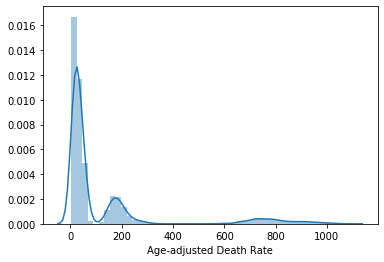

In [68]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

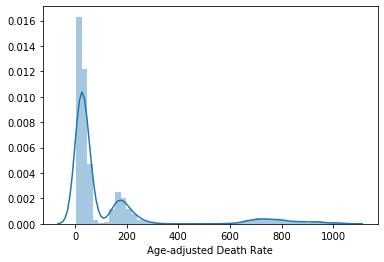

In [72]:
sns.distplot(y_val);

In [69]:
#Linear Regression
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
     StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.9801740969702254


In [70]:
# Gradiant Boosting
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=20, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.9094831938575566


## Using Linear Regression also confirmed that the model was near perfect and it could be trusted as is. The consistency in the accuracy score, in my opinion gives the population a near perfect view of the age and illness that will mostly be the cause of death based on the age adjusted death rate.

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

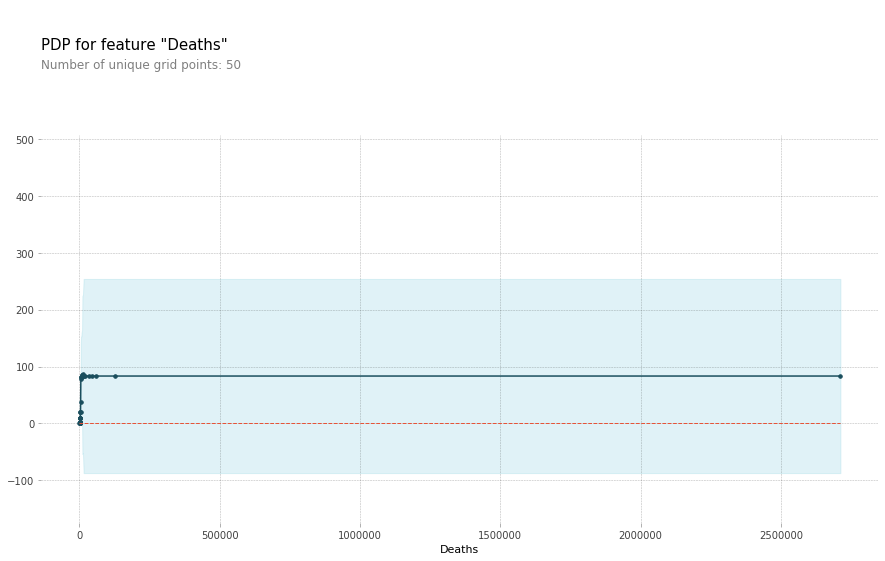

In [90]:
pdp_plot(isolated, feature_name=feature);

In [0]:
feature = 'Deaths'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


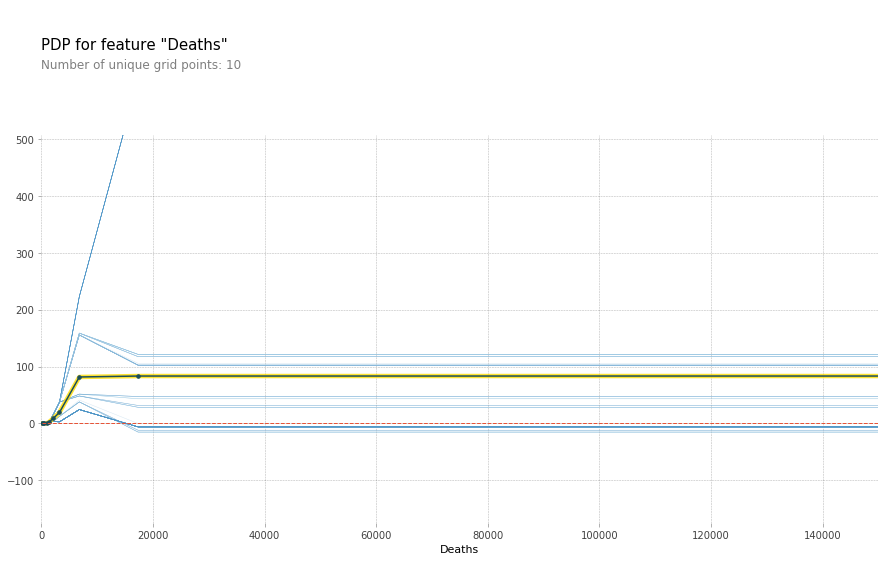

In [76]:
# Plot PDP with 100 ICE curves
# PDP: Partial Dependence Plot
# ICE: Individual Conditional Expectation
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
plt.xlim(0,150000);

In [77]:
# Number of predictions required to make a PDP with 1 feature
# given the size of your dataset, and the number of grid points:
len(X_val) * 10

17390

In [0]:
isolated = pdp_isolate(
    model=gb, 
    dataset=X_val,
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=50
)

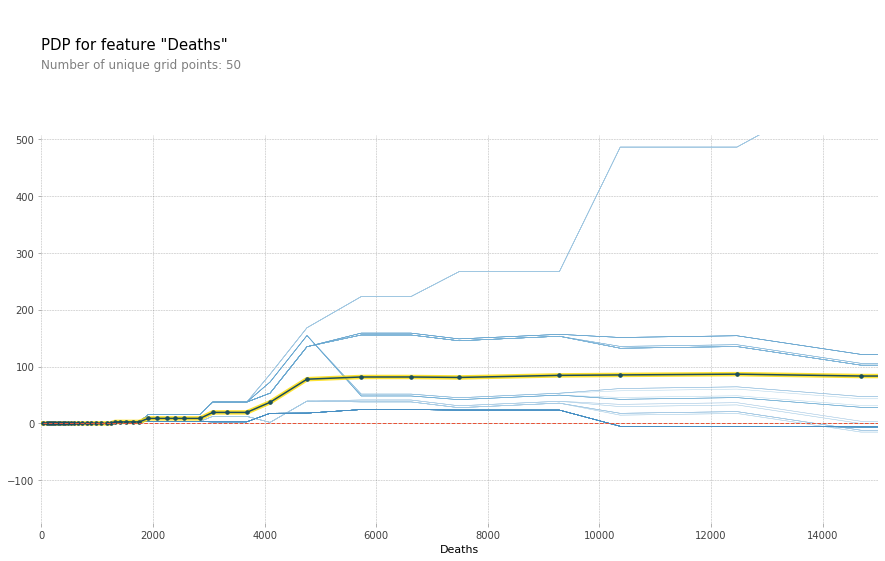

In [79]:
# Plot PDP with 100 ICE curves
# PDP: Partial Dependence Plot
# ICE: Individual Conditional Expectation
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) 
plt.xlim(0,15000);

In [0]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


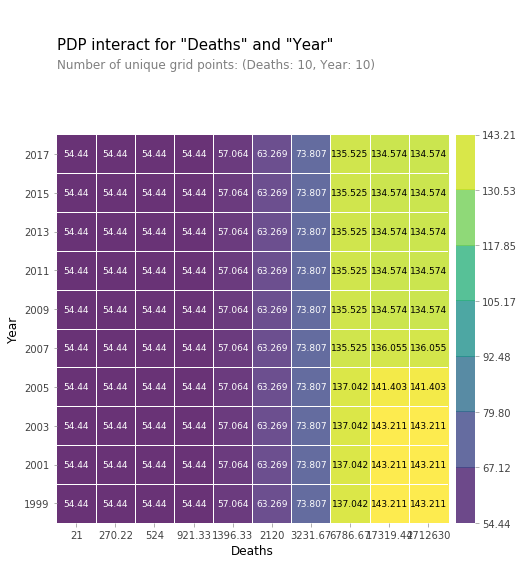

In [82]:
features = ['Deaths', 'Year']

interaction = pdp_interact(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
# Number of predictions required to make a PDP with 2 feature
# given the size of your dataset, and the number of grid points:
len(X_val) * 10**2

173900

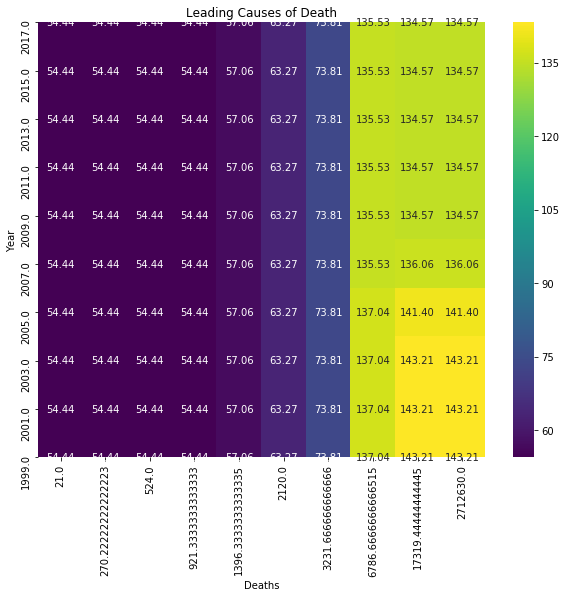

In [83]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Leading Causes of Death');

In [84]:
# Using Categorical Features
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
causes_death=pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD')
causes_death.head()


target = 'Cause Name'
features = causes_death.columns.drop(['Cause Name', '113 Cause Name'])

X = causes_death[features]
y = causes_death[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

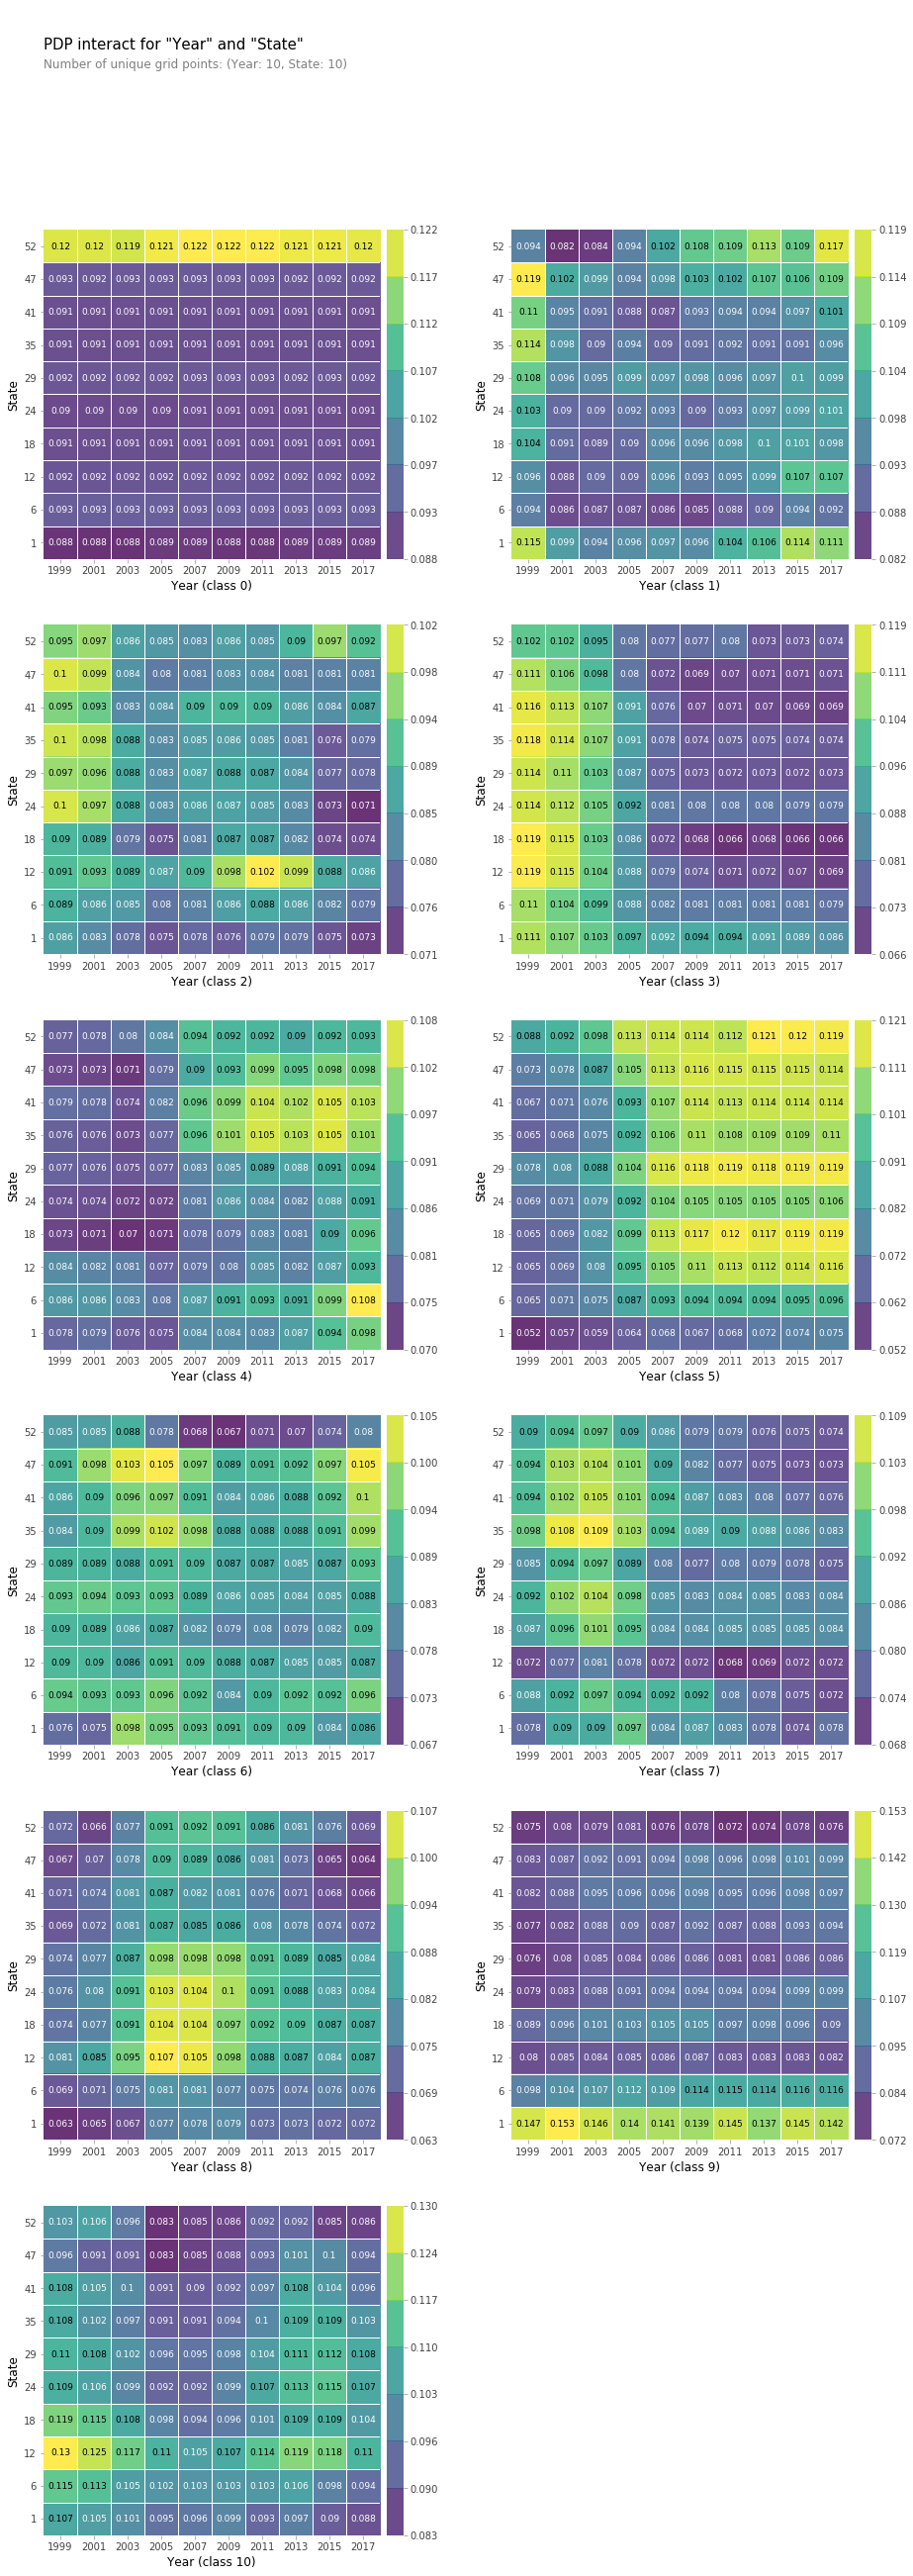

In [86]:
interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

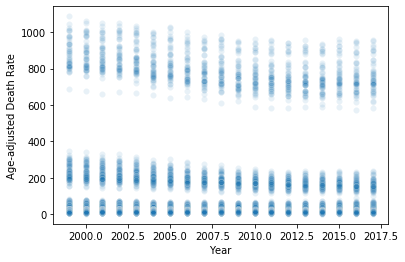

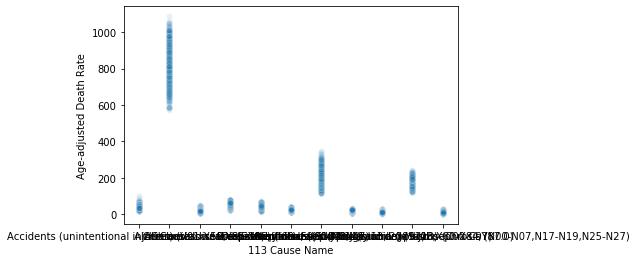

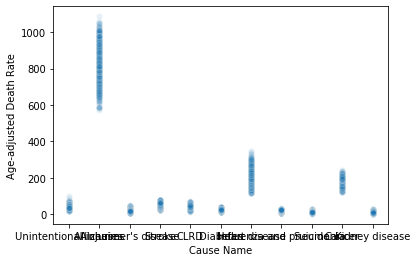

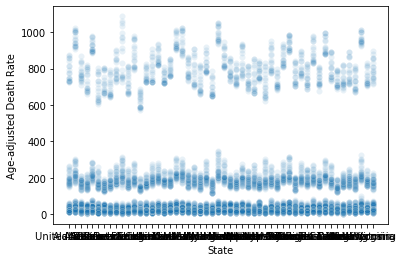

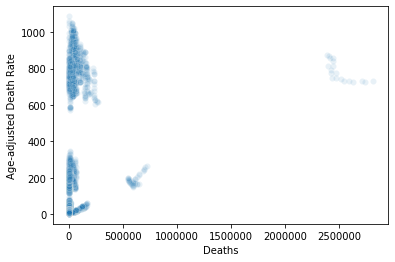

In [0]:
import matplotlib.pyplot as plt
target = 'Age-adjusted Death Rate'
features = causes_death.columns.drop(['Age-adjusted Death Rate'])
for feature in features:
    sns.scatterplot(x=feature, y=target, data=causes_death, alpha=0.1)
    plt.show()

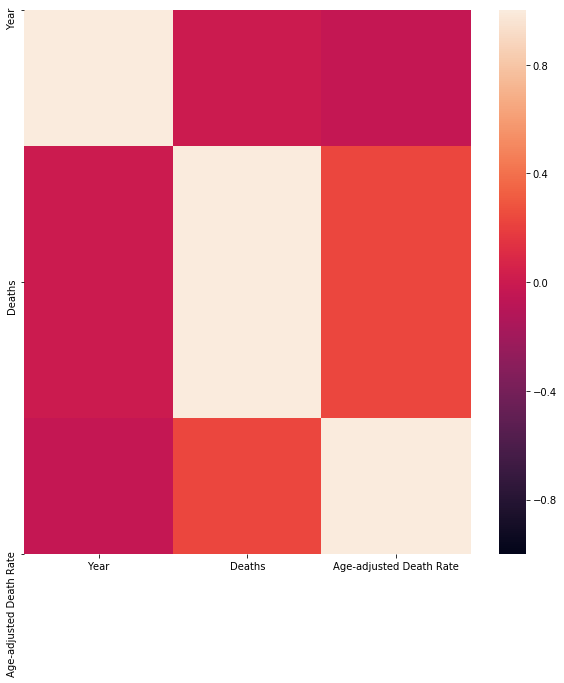

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(causes_death.corr(),vmin=-1);

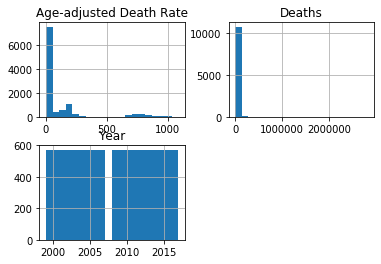

In [0]:
causes_death.hist(bins=20);